<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np




# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

# Step 4: Display PairPlot

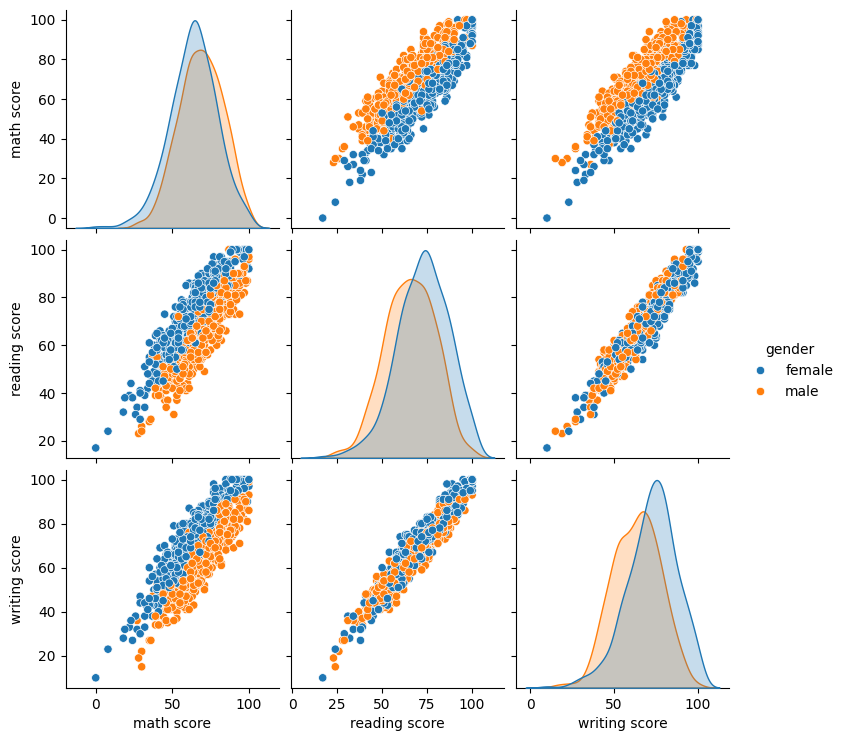

In [4]:
sns.pairplot(df, hue="gender")
plt.show()

# Step 5: Correlation heatmap

In [5]:
features = ["math score", "reading score", "writing score"]
X = df[features]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 6: Distribution of numerical features

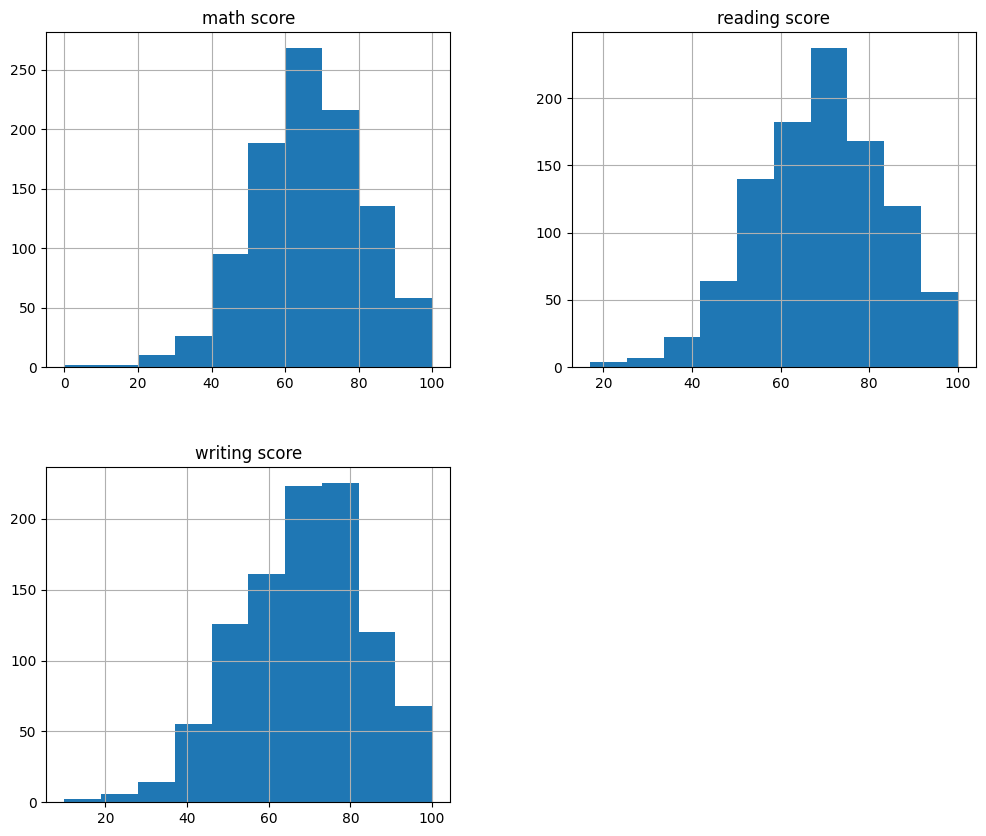

In [6]:
df.hist(figsize=(12,10))
plt.show()

# Step 7: Apply StandardScaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Elbow method to find optimal k

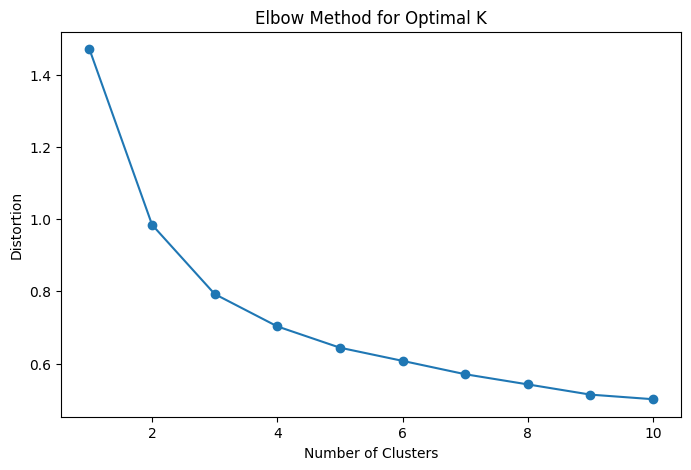

In [8]:
distortions = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 10: Print Cluster Center

In [10]:
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster Centers:
[[65.33860045 68.45823928 67.82167043]
 [48.09638554 50.67068273 48.48594378]
 [81.71428571 85.1461039  84.20779221]]


# Step 11: Plot Cluster

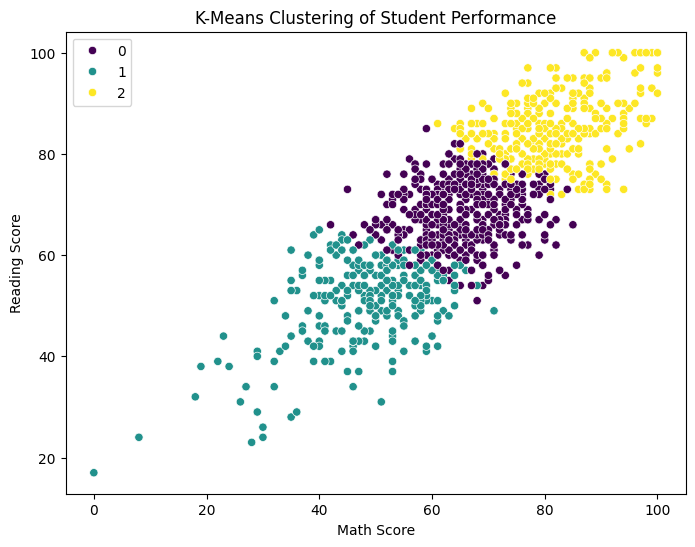

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["math score"], y=df["reading score"], hue=df["Cluster"], palette="viridis")
plt.title("K-Means Clustering of Student Performance")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.legend()
plt.show()

# Step 12:Analyze clusters 

In [12]:
silhouette_avg = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40599504065325176


# Step 13: Perform K-Medoids

In [13]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
df["KMedoids_Cluster"] = kmedoids.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["math score"], y=df["reading score"], hue=df["KMedoids_Cluster"], palette="coolwarm")
plt.title("K-Medoids Clustering of Student Performance")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
silhouette_avg_medoid = silhouette_score(X_scaled, df["KMedoids_Cluster"])
print(f"Silhouette Score for K-Medoids: {silhouette_avg_medoid}")

# Step:14 Comparison of K-means and K-medoids Clusters

In [ ]:
comparison = df[["Cluster", "KMedoids_Cluster"]].value_counts()
print("Comparison of K-Means and K-Medoids Clusters:")
print(comparison)

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [ ]:
cluster_means = df.groupby("Cluster")[features].mean()
print("Cluster Characteristics for K-Means:")
print(cluster_means)



In [ ]:
medoid_cluster_means = df.groupby("KMedoids_Cluster")[features].mean()
print("Cluster Characteristics for K-Medoids:")
print(medoid_cluster_means)